# Huggingface counts 

In [20]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [9]:
html_text = requests.get('https://huggingface.co/languages').text

In [11]:
soup = BeautifulSoup(html_text, 'html.parser')


In [13]:
rows = soup.find_all('tr')

# Initialize lists to store data
languages = []
iso_codes = []
datasets_count = []
models_count = []

In [14]:
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 0:  # Exclude header row
        languages.append(cells[0].get_text(strip=True))
        iso_codes.append(cells[1].find('code').get_text(strip=True))
        datasets_count.append(int(cells[2].get_text(strip=True).replace(',', '')))
        models_count.append(int(cells[3].get_text(strip=True).replace(',', '')))

In [17]:
df = pd.DataFrame({
    'Language': languages,
    'ISO Code': iso_codes,
    'Datasets Count': datasets_count,
    'Models Count': models_count
})

In [18]:
df

,Language,ISO Code,Datasets Count,Models Count
0,EnglishEnglish,en,7757,33948
1,Chinese中文,zh,919,3489
2,FrenchFrançais,fr,822,3205
3,SpanishEspañol,es,645,2489
4,RussianРусский,ru,615,1749
...,...,...,...,...
2041,Southern Luri,luz,1,14
2042,Argentine Sign Language,aed,1,4
2043,Simte,smt,1,15
2044,Chilean Sign Language,csg,1,3


In [21]:
n_of_speakers_data = pd.read_csv('/Users/giuliaocchini/Downloads/data.tsv', sep='\t')
glottolog_data = pd.read_csv('/Users/giuliaocchini/Downloads/languages_and_dialects_geo.csv')
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

/var/folders/sj/rf53f4q13351lmy9q5ygvhdm0000gp/T/ipykernel_49990/3733892100.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


In [80]:
huggingface_n_speakers_all = pd.merge(df, n_of_speakers_data, left_on = 'ISO Code', right_on = 'ISO 639 code', how = 'outer')

In [81]:
huggingface_n_speakers = huggingface_n_speakers_all.dropna(subset=['Language', 'Number of speakers (rounded)'])


In [126]:
huggingface_language_per_speaker = huggingface_n_speakers['Number of speakers (rounded)'].value_counts()

In [127]:
huggingface_language_per_speaker

Number of speakers (rounded)
10K-100K     474
<10K         464
200000       113
100000        65
1000000       63
            ... 
920000000      1
48000000       1
57000000       1
95000000       1
86000000       1
Name: count, Length: 74, dtype: int64

In [132]:
huggingface_language_per_speaker.index = huggingface_language_per_speaker.index.str.replace('<10K', '5000').str.replace('10K-100K', '50000').astype(int)

In [133]:
huggingface_language_per_speaker

Number of speakers (rounded)
50000        474
5000         464
200000       113
100000        65
1000000       63
            ... 
920000000      1
48000000       1
57000000       1
95000000       1
86000000       1
Name: count, Length: 74, dtype: int64

In [134]:
huggingface_language_per_speaker_sorted = huggingface_language_per_speaker.sort_index()

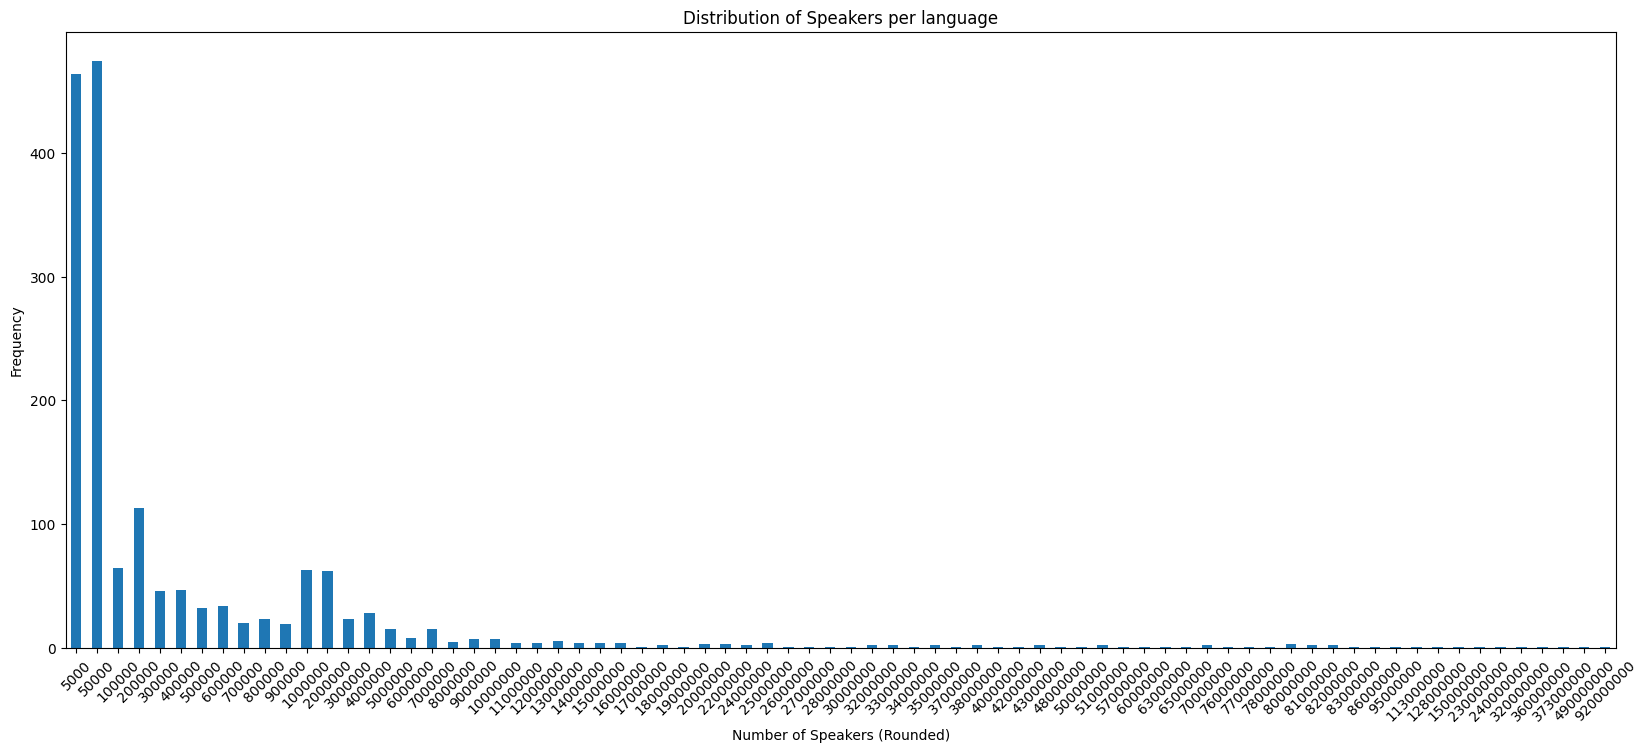

In [135]:
huggingface_language_per_speaker_sorted.plot(kind='bar', figsize=(20,8))
plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Not in huggingface, with speaker counts

In [118]:
n_speakers_no_huggingface = huggingface_n_speakers_all[huggingface_n_speakers_all['Language'].isna()]

In [119]:
n_speakers_no_huggingface_values = n_speakers_no_huggingface['Number of speakers (rounded)'].value_counts()

In [147]:
n_speakers_no_huggingface_values = n_speakers_no_huggingface_values[~n_speakers_no_huggingface_values.index.isin(['50000', '80000'])]


In [136]:
n_speakers_no_huggingface_values.index = n_speakers_no_huggingface_values.index.str.replace('<10K', '5000').str.replace('10K-100K', '50000').astype(int)

In [169]:
n_speakers_no_huggingface_values_sorted = n_speakers_no_huggingface_values.sort_index()

In [170]:
#there is some problem with the values here...

n_speakers_no_huggingface_values_sorted = n_speakers_no_huggingface_values_sorted[~n_speakers_no_huggingface_values_sorted.index.isin([10000, 80000])]

In [177]:
n_speakers_no_huggingface_values_sorted = n_speakers_no_huggingface_values_sorted[~((n_speakers_no_huggingface_values_sorted.index == 50000) & (n_speakers_no_huggingface_values_sorted.values == 1))]

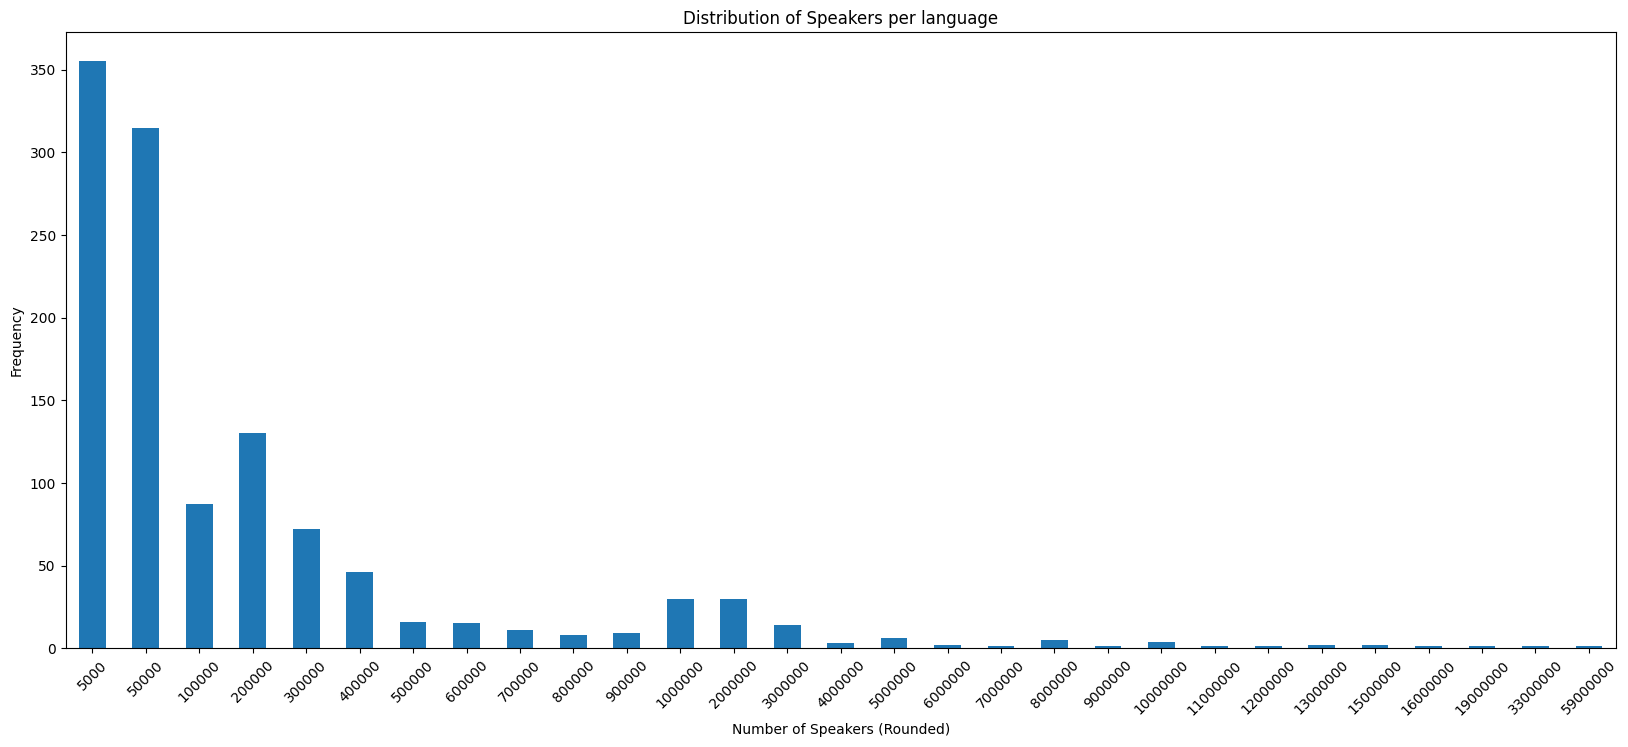

In [179]:
n_speakers_no_huggingface_values_sorted.plot(kind='bar', figsize=(20,8))
plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

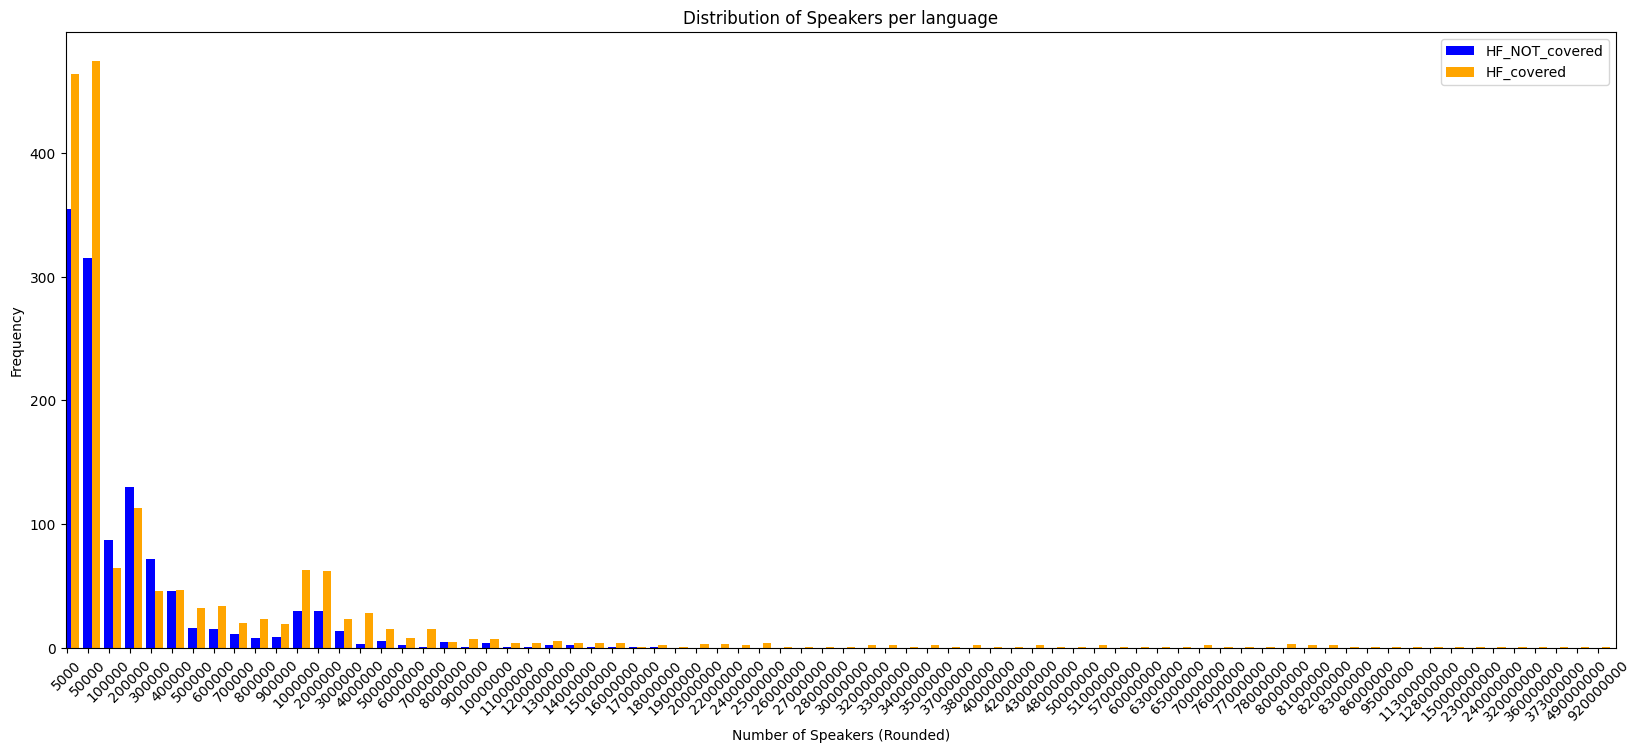

In [182]:
n_speakers_no_huggingface_values_sorted.plot(kind='bar', figsize=(20, 8), color='blue', position=0.5, width=0.4, label='HF_NOT_covered')

huggingface_language_per_speaker_sorted.plot(kind='bar', figsize=(20, 8), color='orange', position=-0.5, width=0.4, label='HF_covered')

plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

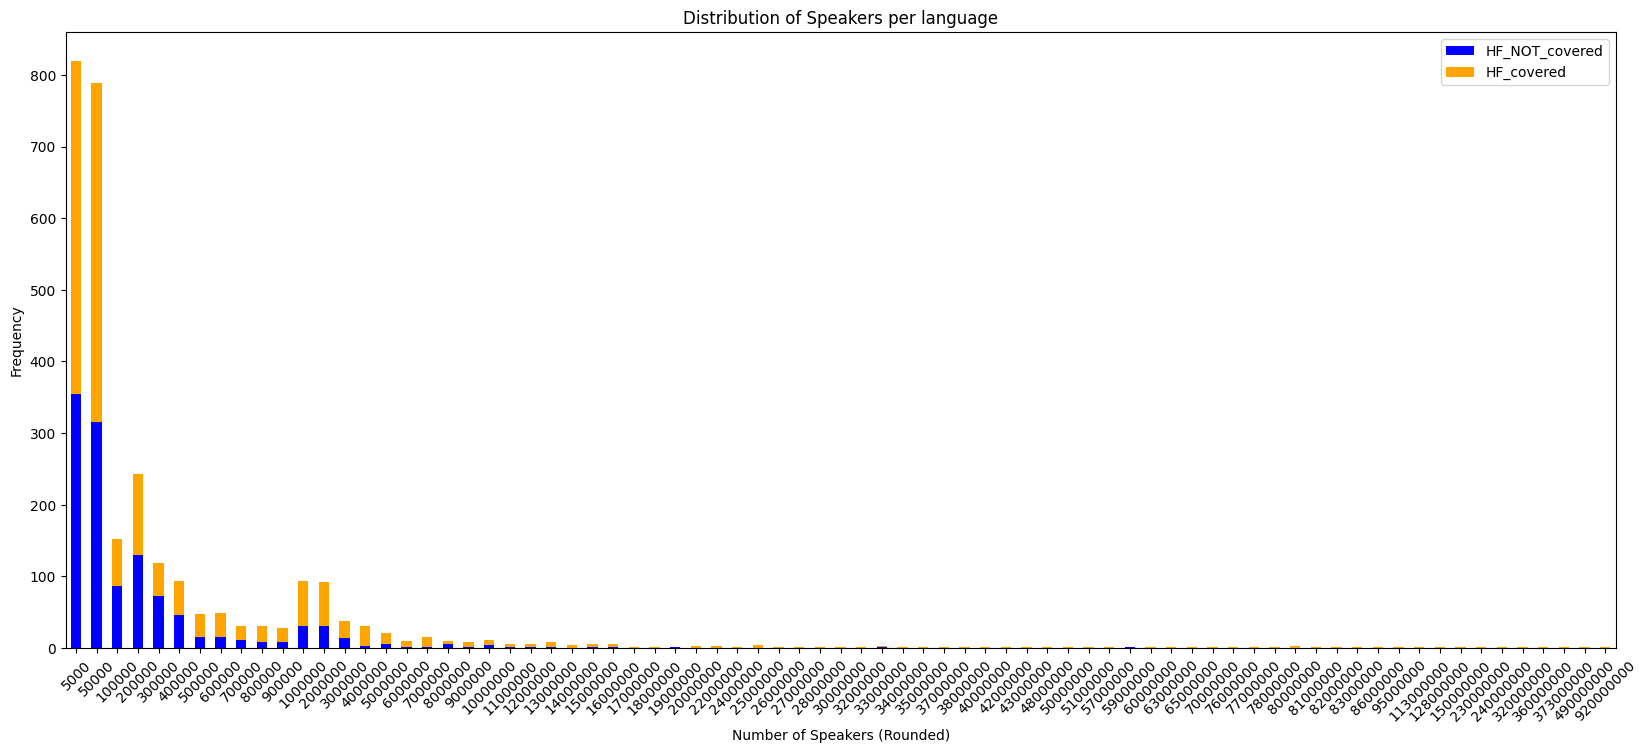

In [183]:
import matplotlib.pyplot as plt

# Assuming n_speakers_no_huggingface_values_sorted1 and n_speakers_no_huggingface_values_sorted2 are your Series objects containing the distributions

# Align the two series
aligned_series = n_speakers_no_huggingface_values_sorted.align(huggingface_language_per_speaker_sorted, fill_value=0)

# Plot histogram for the aligned distributions, stacking them
ax = aligned_series[0].plot(kind='bar', figsize=(20, 8), color='blue', label='HF_NOT_covered')
aligned_series[1].plot(kind='bar', color='orange', label='HF_covered', ax=ax, bottom=aligned_series[0])

plt.xlabel('Number of Speakers (Rounded)')
plt.ylabel('Frequency')
plt.title('Distribution of Speakers per language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()